# Case Study

## Task1 Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index
df = df.iloc[:, 1:]

### Visualisation 

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
count,1.500000e+04,1.500000e+04,15000.000000,15000.00000,15000.000000,1.500000e+04,15000.000000,14997.000000,14997.000000,14997.000000,...,14997.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,4.562654e+09,3.328097e+06,3.372400,2.12635,2096.708267,1.469860e+04,1.509533,0.006801,937.559056,0.227646,...,1972.397546,77.436533,98076.245733,47.554242,-122.213894,1991.374400,12566.263467,48.617462,104.143663,152.761125
std,2.867844e+09,1.643430e+07,0.902832,0.76925,984.417205,3.842964e+04,0.545462,0.082192,268.828882,0.755120,...,29.545072,385.447294,53.580436,0.140877,0.139778,692.536001,26827.490013,22.174254,13.005133,25.724786
min,1.000102e+06,1.000000e+04,0.000000,0.00000,370.000000,5.200000e+02,1.000000,0.000000,93.000000,0.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000,10.010585,55.397985,75.072384
25%,2.124064e+09,3.180000e+05,3.000000,1.75000,1430.000000,5.000000e+03,1.000000,0.000000,757.720000,0.000000,...,1953.000000,0.000000,98031.000000,47.458500,-122.326000,1480.000000,5040.000000,29.262797,95.316786,132.916027
50%,3.888100e+09,4.517775e+05,3.000000,2.25000,1920.000000,7.566000e+03,1.500000,0.000000,936.580000,0.000000,...,1977.000000,0.000000,98065.000000,47.566950,-122.234000,1840.000000,7601.000000,48.557508,104.253927,152.870930
75%,7.300410e+09,6.600000e+05,4.000000,2.50000,2570.000000,1.068575e+04,2.000000,0.000000,1116.120000,0.000000,...,1999.000000,0.000000,98117.000000,47.675325,-122.126000,2380.000000,10050.000000,67.847538,112.975883,172.439485
max,9.895000e+09,1.000000e+08,11.000000,8.00000,17180.000000,1.164794e+06,3.500000,1.000000,1919.340000,4.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6210.000000,871200.000000,86.999842,157.639420,229.276426


In [ ]:
#JOKE: Aber vllt. was ähnliches zur ersten visualisierung
sns.pairplot(df, 
    x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    y_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    corner=True)

### Korrelation
#### Visualisierung
Spearman Korrelation aufgrund der fehlenden normalverteilung (Ausnahme "dis_super"). Wert um 0 bedeuten eine geringe Kerrelation. Werte richtung 1 oder -1 zeigen eine starke Korrelation (positiv & negativ)

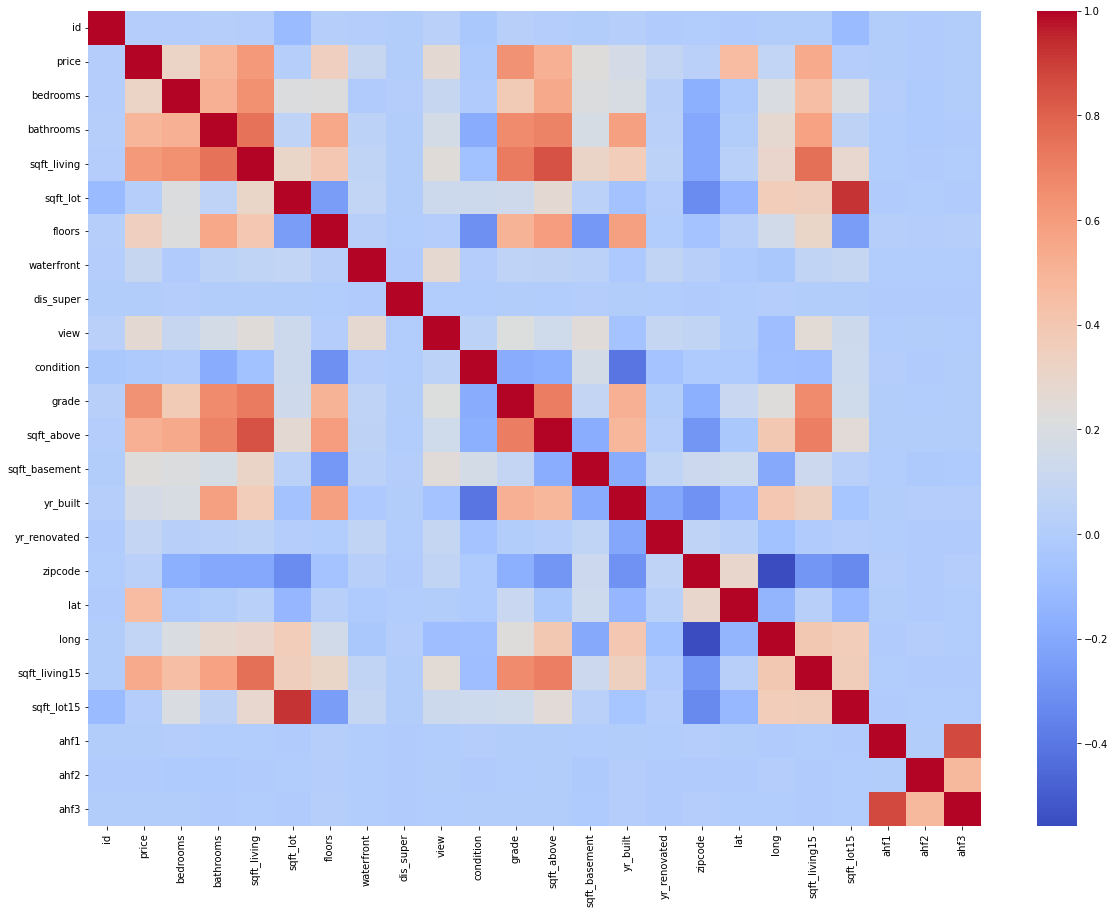

In [47]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap)
plt.show()

In [34]:
#Korrelation für "dis_super"
corr2 =df["dis_super"].corr(df["price"], method="pearson")
print(corr2)

0.008504380766602673


#### In Zahlen

In [70]:
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
for i in ix:
    print("Die Korrelation von", i,"zum Preis:", corr_fig[i])

Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.6401067473706725
Die Korrelation von sqft_living zum Preis: 0.6062749275007229
Die Korrelation von sqft_living15 zum Preis: 0.5421231339869004
Die Korrelation von sqft_above zum Preis: 0.5159252796909916
Die Korrelation von bathrooms zum Preis: 0.4929443152367283
Die Korrelation von lat zum Preis: 0.4585259627037452
Die Korrelation von floors zum Preis: 0.3462941803523132
Die Korrelation von bedrooms zum Preis: 0.3176570486167373
Die Korrelation von view zum Preis: 0.2683337124341474
Die Korrelation von sqft_basement zum Preis: 0.22884018395222322
Die Korrelation von yr_built zum Preis: 0.16733427424846842
Die Korrelation von waterfront zum Preis: 0.09890211702041925
Die Korrelation von yr_renovated zum Preis: 0.08277683118942765
Die Korrelation von long zum Preis: 0.07914908402820331
Die Korrelation von zipcode zum Preis: 0.03421738873320275
Die Korrelation von sqft_lot zum Preis: 0.015221518831488031
Die 

#### Schlussfolgerungen
Mit dem Preis korrelieren insbesondere die Features 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'floors' und 'bedrooms' Diese sollten bei der Feature Selection aufjedenfall berücksichtigt werden.

### Missing Values
##### NaN 

In [ ]:
df.info()

In [ ]:
print("Die Anzahl der Zeilen, in denen MV vorhanden und gekennzeichnet sind beträgt",len(df[df.isnull().any(axis=1)]),":")
df[df.isnull().any(axis=1)]

Es fehlen drei Werte in den Features "Waterfront", "dis_super", "view", "condition", "grade", "sqft_above", "sqft_basement" und "yr_build". Da diese aber alle in den selben drei Zeilen Fehlen kann man auch aufgrund der Größe des Datensatzes diese drei Zeilen löschen.

In [ ]:
#Löschen aller Zeilen mit MV
df=df.dropna()

### Missing Values, die nicht als NaN gekennzeichnet sind

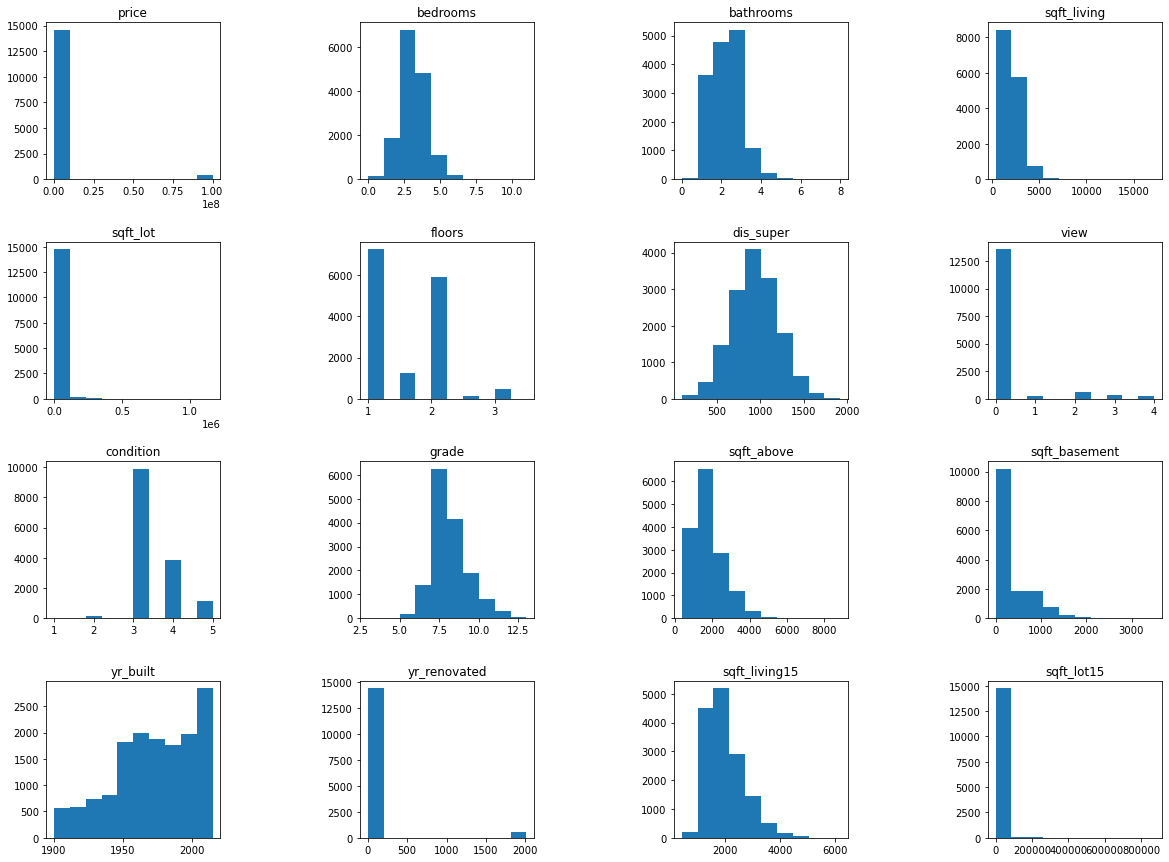

In [14]:
#Hab mir mal deinen Code geklaut -Tim
re_col=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].hist(df[i])
    ax[x].set_title(i)
    x+=1

In [ ]:
df.condition.describe()

Bei den Features **view** und **yr_renovated** scheint der Wert 0 fehlende Werte anzugeben.  
Auch bei **price**, **sqft_lot** und **sqft_lot 15** gibt es unnatürlich viele Werte bei 0. Das scheint aber an Ausreißern (siehe weiter unter) und der kleinen Darstellung zu liegen.


In [ ]:
len_original = len(df)
len_view_values = len(df.loc[df.view != 0])
len_renovated_values = len(df.loc[df.yr_renovated != 0])

print(f"view:\nVon {len_original} Zeilen enthalten {len_view_values} einen Wert\nDas sind {round(len_view_values/len_original*100, 2)}%\n")
print(f"yr_renovated:\nVon {len_original} Zeilen enthalten {len_renovated_values} einen Wert\nDas sind {round(len_renovated_values/len_original*100, 2)}%\n")

Die Features **view** und **yr_renovated** enthalten größtenteils fehlende Werte. Die Zeilen zu entfernen ist daher keine Option.  
Außerdem liefern uns diese fehlenden Werte womöglich Informationen:  

In [ ]:
no_renovated_mean = round(df1.loc[df1.yr_renovated == 0].price.mean(), 2)
renovated_mean = round(df1.loc[df1.yr_renovated != 0].price.mean(), 2)

print(f"The median price for not renovated buildings is : {not_renovated_mean}\nThe median price for renovated buildings is : {renovated_mean}")

> Die Analyse macht erst nach der entfernung von Ausreißern sinn. Mehrere hundert Gebäude sind 999999999 Euro Wert.

In [ ]:
no_view_mean = round(df.loc[df.view == 0].price.mean(), 2)
view_mean = round(df.loc[df.view != 0].price.mean(), 2)

print(f"The median price for not renovated buildings is : {no_view_mean}\nThe median price for renovated buildings is : {view_mean}")

### Outliers

In [ ]:
#Visuallisierung von Ausreißern
re_col=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].boxplot(df[i])
    ax[x].set_title(i)
    x+=1

#Ausreißer behandlung natürlich erst nach der Normalisierung aber für den ersten überblick. 
#Anmerkung von Tim: Warum erst nach der Normalisierung? Normalisierung kann nicht mit Ausreßern umgehen. 

In [ ]:
df.loc[df.view != 0].view

Ganz klare Ausreißer beim Preis und bei den verschiedenen Flächen (sqft_...)  
  
Außerdem auffällig:  
- yr_renovated 



### Noise

### Transformed, standardized or normalized

In [ ]:
#Transform Data 

#Example --> string to datetime
df["date"] = pd.to_datetime(df["date"])
print(df["grade"])
df.tail()

### Featurewise

In [ ]:
print(df.columns)

**ID**  
Identifier. Kein Mehrwert für ML.  
--> Entfernen

**Date**  
Anscheinend keine Ausreißer  
Das Datum sollte man vermutlich einfach so lassen.  
--> ?

In [ ]:
plt.hist(df.price)